**This  a first projectr for image classification using Tensorflow and Keras**


# 1.Setup and Dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.1.0
blinker                          1.4
bl

In [3]:
import tensorflow as tf
import os

##Show the list of the available physical GPU devices.

In [10]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [11]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

##Setting the memory growth mode to True means that TensorFlow will allocate GPU memory as needed

In [12]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

##Remove dodgy images

In [17]:
import imghdr
import cv2

In [18]:
!unzip cat.zip -d /content/data/cat
!unzip dog.zip -d /content/data/dog

Archive:  cat.zip
 extracting: /content/data/cat/vector.svg  
 extracting: /content/data/cat/vector2.svg  
 extracting: /content/data/cat/vector3.svg  
 extracting: /content/data/cat/vector4.svg  
 extracting: /content/data/cat/vector5.svg  
 extracting: /content/data/cat/vector6.svg  
 extracting: /content/data/cat/vector7.svg  
 extracting: /content/data/cat/vector8.svg  
 extracting: /content/data/cat/vector9.svg  
 extracting: /content/data/cat/vector10.svg  
 extracting: /content/data/cat/vector11.svg  
 extracting: /content/data/cat/vector12.svg  
 extracting: /content/data/cat/image.jpeg  
 extracting: /content/data/cat/image2.jpeg  
 extracting: /content/data/cat/image3.jpeg  
 extracting: /content/data/cat/image4.jpeg  
 extracting: /content/data/cat/image5.jpeg  
 extracting: /content/data/cat/image6.jpeg  
 extracting: /content/data/cat/image7.jpeg  
 extracting: /content/data/cat/image8.jpeg  
 extracting: /content/data/cat/image9.jpeg  
 extracting: /content/data/cat/image

In [20]:
os.listdir('/content/data/cat')

['cats-speak.png',
 'CLS2022-Hero-2-scaled-e1677032566544.jpg',
 'Thinking-of-getting-a-cat.png',
 'images101.jpg',
 'egypt_kitty_social.jpg',
 '1177177-cat-at-home-banner_990x350.jpg',
 'nger_20Cats_20are_20so_20Special_20_5Breviewed_5D-Jul-06-2021-03-25-58-99-PM.jpg',
 'DCTM_Penguin_UK_DK_AL697473_RGB_PNG_namnse.jpg',
 'AKPQZvwKtBTO5bjvJ_UkP98420xbcQkc3zLLpQ0GGncrs64-c-mo.jpg',
 'image20.jpeg',
 'red-white-cat-i-white-studio_155003-13189.jpg',
 'image25.jpeg',
 'images56.jpg',
 'petting_pet_cat-1200x628-facebook-1200x628.jpg',
 'image12.jpeg',
 '13154944-7d84c2ad-e03e-4ac1-a011-7cbdb2cd2c39.jpg',
 'cats-that-look-like-tigers-leopards-and-cheetahs.png',
 'images40.jpg',
 'home-page-image.png',
 'neva-masquerade-royalty-free-image-1674509896.jpg',
 'images79.jpg',
 'image26.jpeg',
 'NationalGeographic_2572187_square.jpg',
 'images82.jpg',
 'images32.jpg',
 'AdobeStock_503976678-scaled.jpeg',
 'vector3.svg',
 'images41.jpg',
 'image11.jpeg',
 '728px-What_kind_of_cat_am_i.png',
 'images1

In [21]:
os.listdir('/content/data/dog')

['191006152638-01-pets-and-our-health.jpg',
 'TELEMMGLPICT000321244283_trans_NvBQzQNjv4BqRo0U4xU-30oDveS4pXV-Vv4Xpit_DMGvdp2n7FDd82k.jpeg',
 'dog-gbfe9c6841_1920_2.jpg',
 'AKPQZvwKtBTO5bjvJ_UkP98420xbcQkc3zLLpQ0GGncrs64-c-mo.jpg',
 'German-shepherd.jpg',
 'image20.jpeg',
 'image25.jpeg',
 'golden-retriever-puppy.jpg',
 'image12.jpeg',
 'adolescent-dog-with-stick.jpg',
 'images40.jpg',
 'image26.jpeg',
 'dog-diarrhea-1.jpg',
 'images32.jpg',
 'vector3.svg',
 'images41.jpg',
 'image11.jpeg',
 'maltese-portrait.jpg',
 'shelter-dog-cropped-1.jpeg',
 'the-shiba-inu-species-is-looking-at-its-owner-in-royalty-free-image-1656368953.jpg',
 'dog-allergies.jpg',
 'domestic-dog_thumb_square.jpg',
 'images34.jpg',
 'isolated-happy-smiling-dog-white-background-portrait-4_1562-693.jpg',
 'cute-dog-headshot.jpg',
 'international_dog_day_1692974397743_1692974414085.jpg',
 'images46.jpg',
 'images27.jpg',
 'dog-puppy-on-garden-royalty-free-image-1586966191.jpg',
 'NationalGeographic_2731043_4x3.jpg',
 '

In [23]:
len(os.listdir('/content/data/dog'))

169

In [24]:
data_dir='data'

In [25]:
img_ext=['png','jpg','jpeg']

In [31]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'cat', 'dog']

In [37]:
for folder in os.listdir(data_dir):
  print(folder)
  for img in os.listdir(os.path.join(data_dir,folder)):
      img_path=os.path.join(data_dir,folder,img)
      if imghdr.what(img_path) not in img_ext:
         os.remove(img_path)

.ipynb_checkpoints
cat
dog


In [39]:
len(os.listdir(os.path.join(data_dir,'dog')))

148

In [42]:
test_img=cv2.imread(os.path.join(data_dir,'cat','00000153-bebc-d742-a553-bffd3c270000_square.jpg'))

In [43]:
type(test_img)

numpy.ndarray

In [44]:
test_img.shape

(3072, 3072, 3)

In [45]:
import matplotlib.pyplot as plt

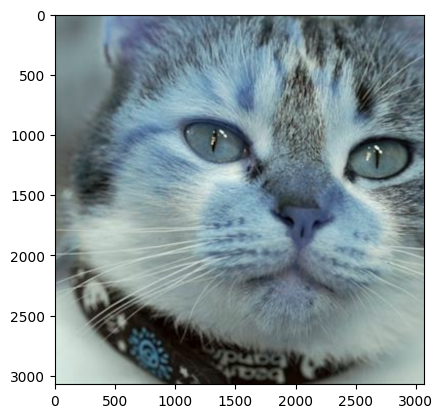

In [47]:
plt.imshow(test_img)

In [50]:
test_img=cv2.cvtColor(test_img,cv2.COLOR_RGB2BGR)
test_img2=cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)

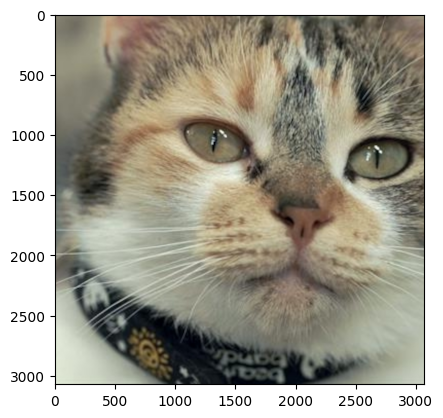

In [51]:
plt.imshow(test_img2)

##load Data

In [54]:
tf.data.Dataset??

In [55]:
tf.keras.utils.image_dataset_from_directory??

In [70]:
os.listdir('data')

['cat', 'dog']

In [67]:
!rmdir /content/drive/My Drive/DeepCID/model_cnn/".ipynb_checkpoints"

rmdir: failed to remove '/content/drive/My': No such file or directory
rmdir: failed to remove 'Drive/DeepCID/model_cnn/.ipynb_checkpoints': No such file or directory


In [69]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [72]:
data=tf.keras.utils.image_dataset_from_directory('data',shuffle=True)

Found 365 files belonging to 2 classes.


In [73]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [74]:
data_iterator=data.as_numpy_iterator()

In [76]:
data_iterator.next()

(array([[[[ 84.       ,  42.       ,  20.       ],
          [ 84.25781  ,  42.257812 ,  20.257812 ],
          [ 85.       ,  43.       ,  21.       ],
          ...,
          [109.       ,  52.       ,  32.       ],
          [109.       ,  52.       ,  32.       ],
          [109.       ,  52.       ,  32.       ]],
 
         [[ 84.       ,  42.       ,  20.       ],
          [ 84.25781  ,  42.257812 ,  20.257812 ],
          [ 85.       ,  43.       ,  21.       ],
          ...,
          [109.       ,  52.       ,  32.       ],
          [109.       ,  52.       ,  32.       ],
          [109.       ,  52.       ,  32.       ]],
 
         [[ 84.140625 ,  42.140625 ,  20.140625 ],
          [ 84.36218  ,  42.362183 ,  20.362183 ],
          [ 85.060425 ,  43.060425 ,  21.060425 ],
          ...,
          [109.       ,  52.       ,  32.       ],
          [109.       ,  52.       ,  32.       ],
          [109.       ,  52.       ,  32.       ]],
 
         ...,
 
         [[1

In [93]:
batch=next(data_iterator)

batch[0].shape

(32, 256, 256, 3)

In [80]:
len(next(data_iterator)[1])

32

In [86]:
batch[1]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int32)

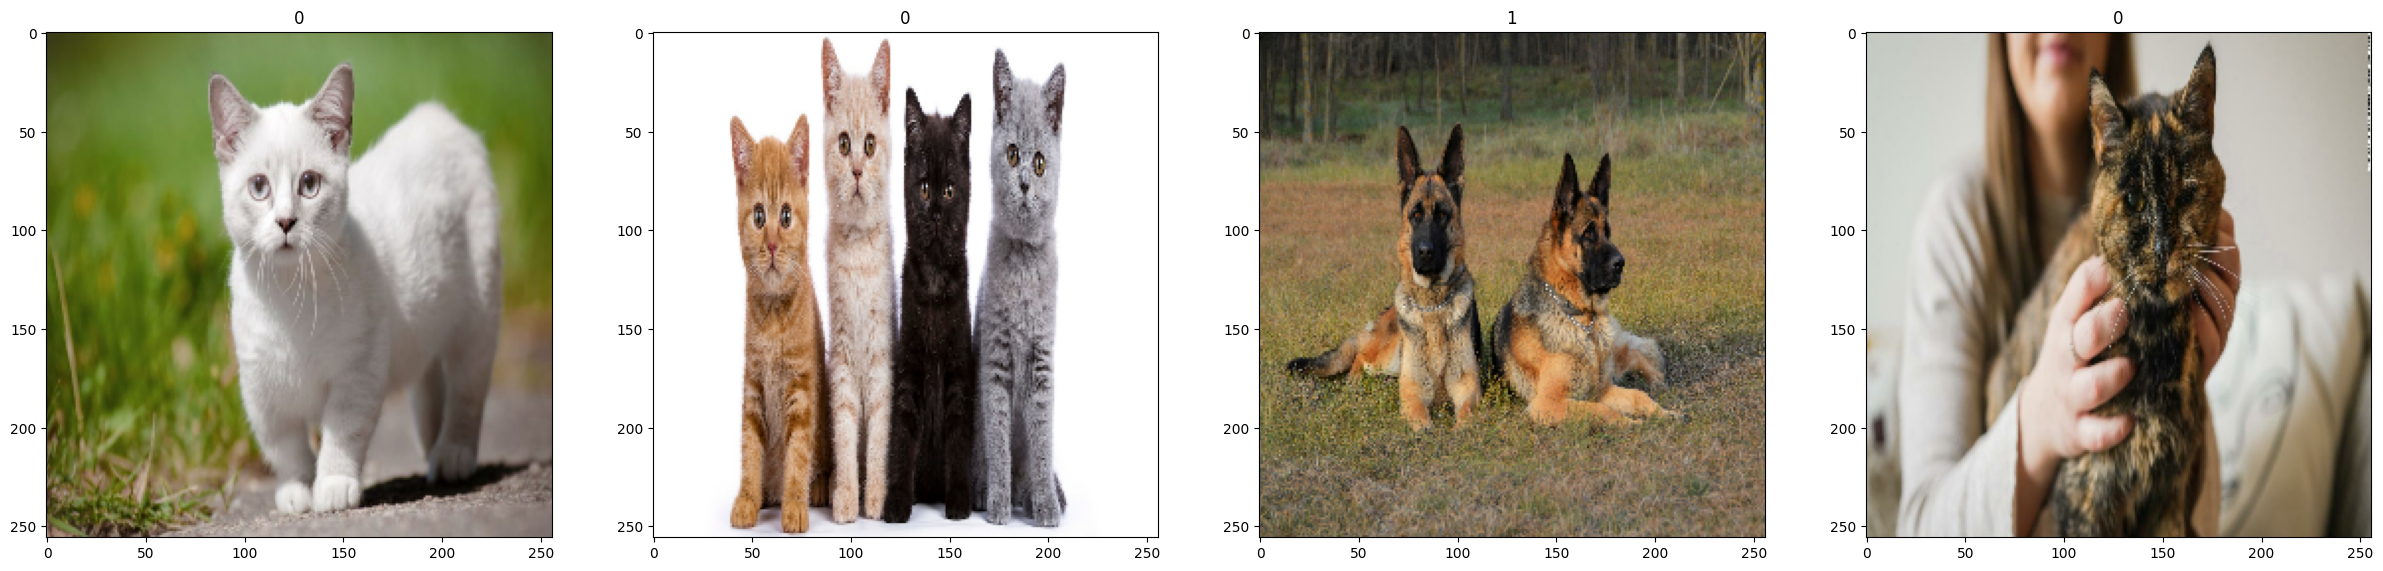

In [96]:
fig,ax=plt.subplots(ncols=4,figsize=(30,30))

for i,img in enumerate(batch[0][:4]):
   ax[i].imshow(img.astype(int))
   ax[i].title.set_text(batch[1][i])

In [113]:
batch[0].max()

1.0

TypeError: ignored

#Preprocess Data

#Scale Data

In [102]:
data=data.map(lambda x,y:(x/255,y))

In [104]:
scale=data.as_numpy_iterator()

In [105]:
batch=scale.next()

In [108]:
batch[0].max()

1.0

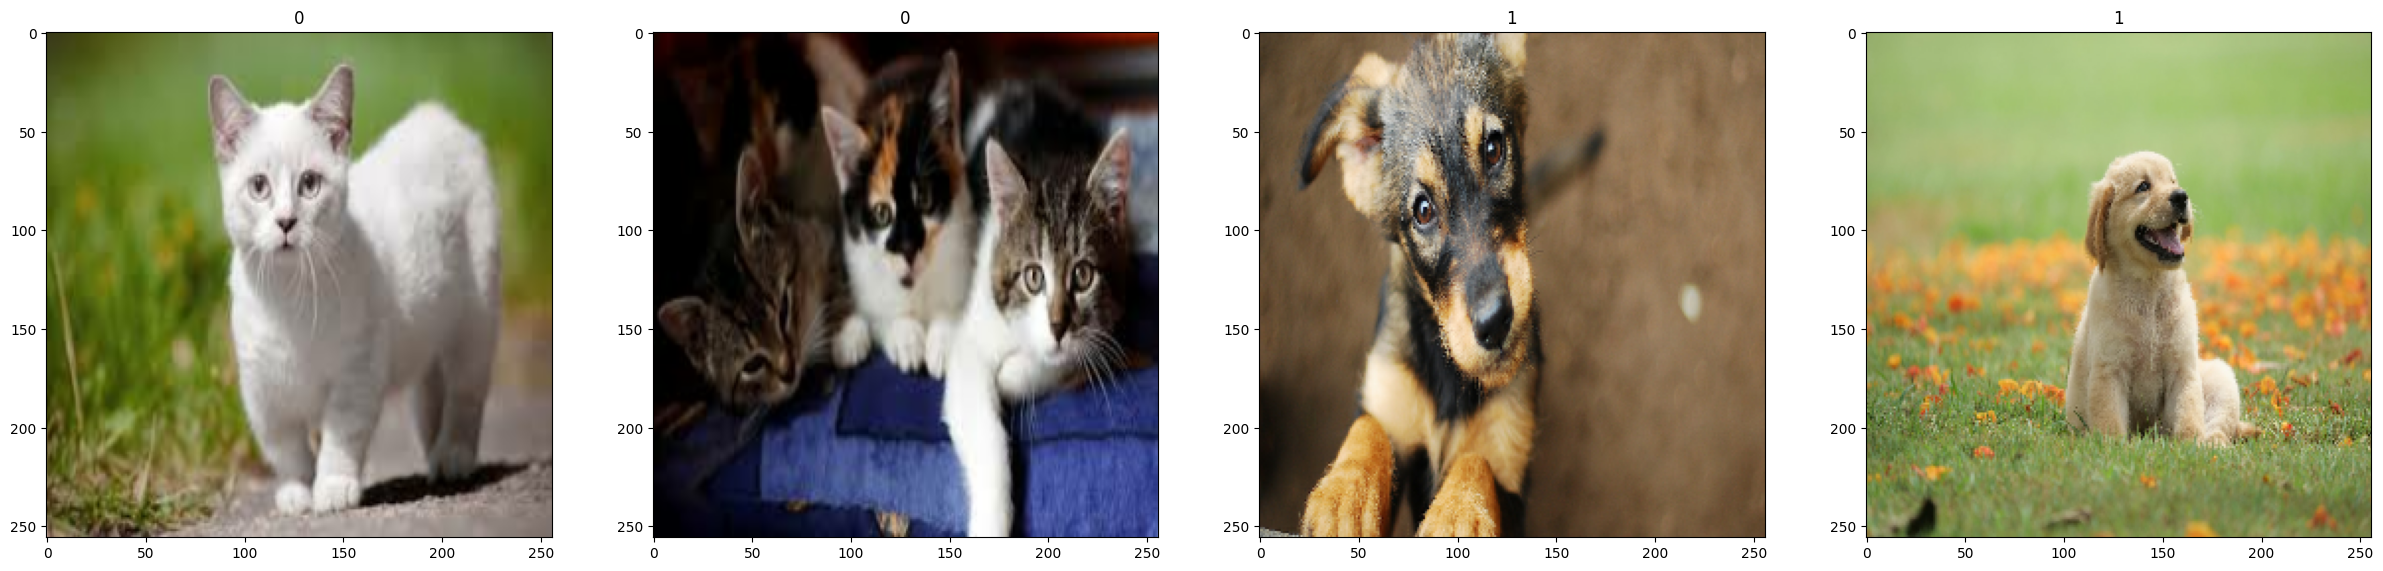

In [111]:
fig,ax=plt.subplots(ncols=4,figsize=(30,30))
for i,img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(float))
    ax[i].title.set_text(batch[1][i])

In [114]:
len(data)

12

In [124]:
train_size=int(len(data)*.7)
validation_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)

In [125]:
train=data.take(train_size)
val=data.skip(train_size).take(validation_size)
test=data.skip(train_size+validation_size).take(test_size)

In [136]:
batch[0].shape

(32, 256, 256, 3)

#Build the DL model

##build model

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout

In [127]:
model=Sequential()

In [130]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [137]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [139]:
logdir='logs'

In [140]:
tensor_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [141]:
hist=model.fit(train, epochs=20,validation_data=val,callbacks=[tensor_callback])

Epoch 1/20
8/8 [==============================] - 20s 592ms/step - loss: 0.8231 - accuracy: 0.4648 - val_loss: 0.6911 - val_accuracy: 0.6875
Epoch 2/20
8/8 [==============================] - 9s 899ms/step - loss: 0.6908 - accuracy: 0.6172 - val_loss: 0.6791 - val_accuracy: 0.6250
Epoch 3/20
8/8 [==============================] - 8s 697ms/step - loss: 0.6714 - accuracy: 0.6094 - val_loss: 0.6119 - val_accuracy: 0.6667
Epoch 4/20
8/8 [==============================] - 8s 680ms/step - loss: 0.6731 - accuracy: 0.6016 - val_loss: 0.6163 - val_accuracy: 0.5729
Epoch 5/20
8/8 [==============================] - 8s 689ms/step - loss: 0.6231 - accuracy: 0.6406 - val_loss: 0.6035 - val_accuracy: 0.7604
Epoch 6/20
8/8 [==============================] - 8s 792ms/step - loss: 0.5641 - accuracy: 0.7031 - val_loss: 0.4768 - val_accuracy: 0.7292
Epoch 7/20
8/8 [==============================] - 9s 893ms/step - loss: 0.4926 - accuracy: 0.7539 - val_loss: 0.4457 - val_accuracy: 0.7812
Epoch 8/20
8/8 [===

In [148]:
hist.history

{'loss': [0.8230714797973633,
  0.6907983422279358,
  0.6713743805885315,
  0.6730624437332153,
  0.6231444478034973,
  0.5640509724617004,
  0.49261200428009033,
  0.442199170589447,
  0.3123648464679718,
  0.24707654118537903,
  0.19007958471775055,
  0.13294094800949097,
  0.10145983099937439,
  0.09595917165279388,
  0.07125210762023926,
  0.07306738942861557,
  0.0781024843454361,
  0.11826629936695099,
  0.05950579047203064,
  0.03314482793211937],
 'accuracy': [0.46484375,
  0.6171875,
  0.609375,
  0.6015625,
  0.640625,
  0.703125,
  0.75390625,
  0.79296875,
  0.875,
  0.87109375,
  0.9140625,
  0.94140625,
  0.96875,
  0.96484375,
  0.98828125,
  0.96875,
  0.9765625,
  0.96875,
  0.98828125,
  0.98828125],
 'val_loss': [0.691125214099884,
  0.6791462898254395,
  0.6119069457054138,
  0.6163145899772644,
  0.603496253490448,
  0.47679972648620605,
  0.4456566274166107,
  0.3606314957141876,
  0.3250649869441986,
  0.2263583540916443,
  0.18874841928482056,
  0.06954925507307

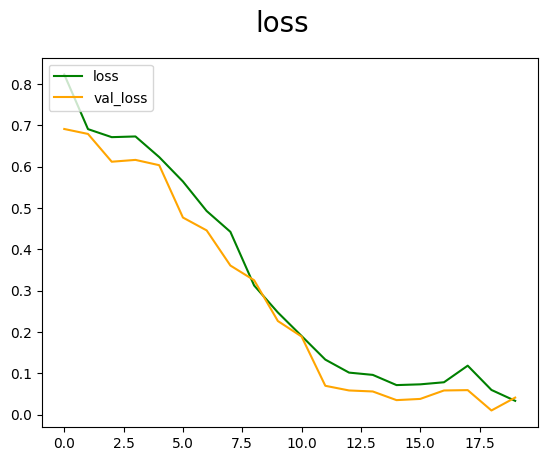

In [145]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='green',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20 )
plt.legend(loc='upper left')
plt.show()

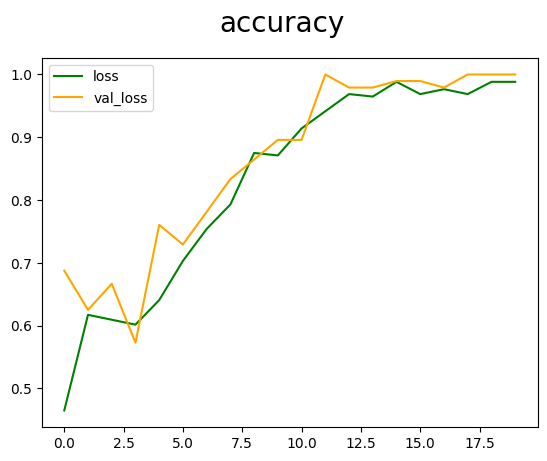

In [153]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='green',label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('accuracy',fontsize=20 )
plt.legend(loc='upper left')
plt.show()

#Evalute performance

In [158]:
from tensorflow.keras.metrics import Recall ,Precision ,BinaryAccuracy

In [159]:
recall=Recall()
precision=Precision()
accuracy=BinaryAccuracy()

In [160]:
for batch in test.as_numpy_iterator():
    X,y=batch
    y_pre=model.predict(X)
    recall.update_state(y,y_pre)
    precision.update_state(y,y_pre)
    accuracy.update_state(y,y_pre)

1/1 [==============================] - 0s 322ms/step


In [162]:
recall.result().numpy()

1.0

In [163]:
accuracy.result().numpy()

1.0

In [164]:
precision.result().numpy()

1.0

In [165]:
import cv2

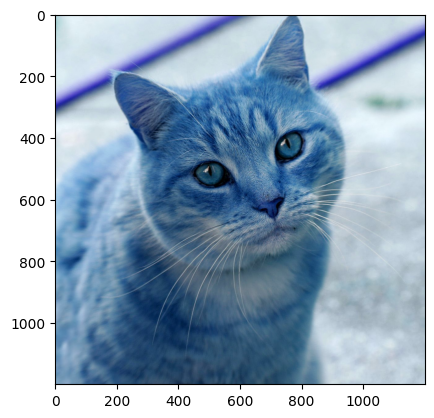

In [193]:
img=cv2.imread('catt.jpg')
plt.imshow(img)
plt.show()

In [194]:
imgg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

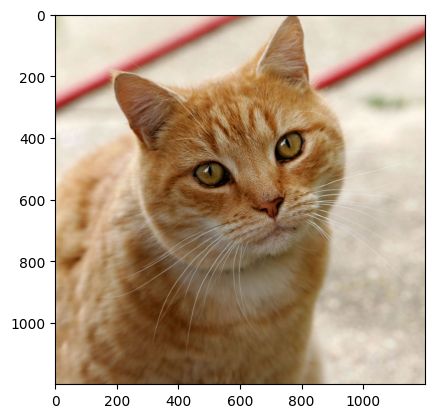

In [195]:
plt.imshow(imgg)

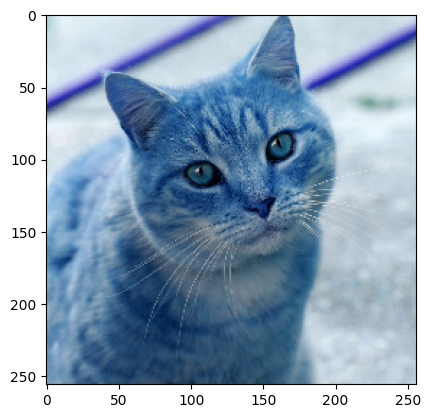

In [196]:
img_resize=tf.image.resize(img,(256,256))

plt.imshow(img_resize.numpy().astype(int))
plt.show()

In [198]:
import numpy as np

In [199]:
ypred=model.predict(np.expand_dims(img_resize/255,0))

1/1 [==============================] - 0s 19ms/step


In [200]:
ypred

array([[0.00375636]], dtype=float32)

#Save the model

In [201]:
from tensorflow.keras.models import load_model

In [202]:
model.save(os.path.join('models','catdog.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Convert the model from h5 to tflite

In [205]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)


In [206]:
tflite_model = converter.convert()


In [207]:
open("converted_model.tflite", "wb").write(tflite_model)

14790588

#load the model after saving

In [208]:
test_model=load_model(os.path.join('models','catdog.h5'))

In [210]:
image=cv2.imread('dogg.jpeg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

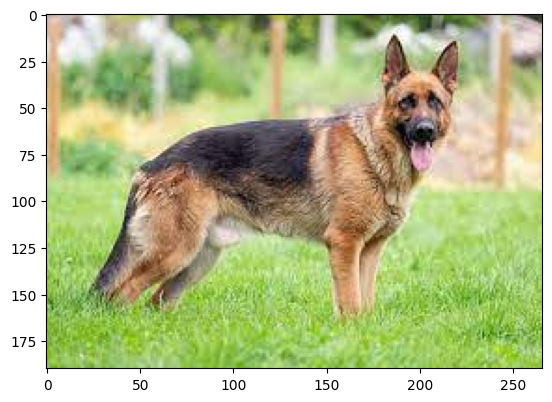

In [211]:
plt.imshow(image)

In [212]:
imager=tf.image.resize(image,(256,256))


In [215]:
pre=test_model(np.expand_dims(imager/255,0))

In [219]:
pre

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9954033]], dtype=float32)>